# Analyse du jeux de données de Google PlayStore avec Python

> ## Importation des packages nécessaires : 

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ignorer l'affichage des warnings
import warnings
warnings.filterwarnings( 'ignore' )

# linear regression
#import the libraries
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Importing all necessary libraries
import scipy.stats as stats
%matplotlib inline

> ## Lecture des données :

In [242]:
# importation du dataset, affichage de ses 1ères lignes
df = pd.read_csv( "/Users/abdelilahmoulida/Desktop/googleplaystore/googleplaystore.csv" )
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> ## Traitement des données : 
### <b style="font-size:14pt;">Gestion des valeurs NULL :</b>

<i><u><b style="font-size:14pt;">Remarque :</b></u> <b style="font-size:12pt;">nombreuses valeurs NULL dans Rating, et quelques-unes dans Type, Current Ver et Avdroid Ver.</b></i>

In [243]:
# affichage du nombre de valeur NULL par colonne
print( df.isnull().sum() )

# suppression des colonnes avec des valeurs NULL
df.dropna( inplace = True ) 

df.shape

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


(9360, 13)

In [244]:
# suppression des doublons
df.drop_duplicates(inplace=True)

In [245]:
# dimension du data set : 8886 lignes et 13 colonnes
df.shape

(8886, 13)

### <b style="font-size:14pt;">Gestion des types de données :</b>

In [246]:
# affichage des types de données de chaque colonnes du dataset
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
App               8886 non-null object
Category          8886 non-null object
Rating            8886 non-null float64
Reviews           8886 non-null object
Size              8886 non-null object
Installs          8886 non-null object
Type              8886 non-null object
Price             8886 non-null object
Content Rating    8886 non-null object
Genres            8886 non-null object
Last Updated      8886 non-null object
Current Ver       8886 non-null object
Android Ver       8886 non-null object
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<i><b style="font-size:14pt;">Les <u>types de données</u></b> <b style="font-size:12pt;">doivent être modifiés dans un format approprié pouvant être utilisé pour l'analyse.<br>
</b></i><b><i style="font-size:14pt;"><u>Reviews</u></i></b> <b style="font-size:12pt;"><i>doit être de type numérique.</i></b><b><i style="font-size:14pt;"> <u>Size</u>, <u>Installs</u>, <u>Price</u> et <u>Android Vers</u></i></b> <b style="font-size:12pt;"><i>doivent également être de type numérique. Leurs valuers doivent être modifiées dans un format approprié afin que nous puissions les utiliser pour l’analyse et les graphiques.</i></b>

<b><i style="font-size:14pt;"><u>Reviews</u> :</i></b>

In [247]:
# conversion du type de "Reviews" de 'object' vers 'int64'
df.Reviews = df.Reviews.astype('int64')

In [248]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<b><i style="font-size:14pt;"><u>Size</u> :</i></b>

\pagebreak

In [249]:
# nouvelle valeur de la varaible Size
newSize = []

for row in df.Size:
    # enlevement du caractere M
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0)

# la nouvelle colonne Size
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

<b><i style="font-size:14pt;"><u>Installs</u> :</i></b>

In [250]:
# nouvelle valeur de la variable Size
newInstalls = []

for row in df.Installs:
    # enlevement du signe $
    row = row[:-1]
    
    # enlevement de la ,
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    
# la nouvelle colonne Installs
df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

<b><i style="font-size:14pt;"><u>Price</u> :</i></b>

\pagebreak

In [251]:
newPrice = []

for row in df.Price:
    if row!= "0":
        # si l'application est payante on l'attribue la valeur 1
        newrow = float(row[1:])
    else:
        # 0 pour les applications non payante
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

<b><i style="font-size:14pt;"><u>Android Ver</u> :</i></b>

In [252]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        # quand la valeur de la colonnes est - Varies with device
        newrow = 0  
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

> ## Statstiques descriptives :
### <b style="font-size:16pt;">Analyses univariés : </b>

<b><i style="font-size:14pt;">Variable <u>Catégorie</u> :</i></b>

In [253]:
# affichage de toutes les catégories et de leurs comptes
df.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

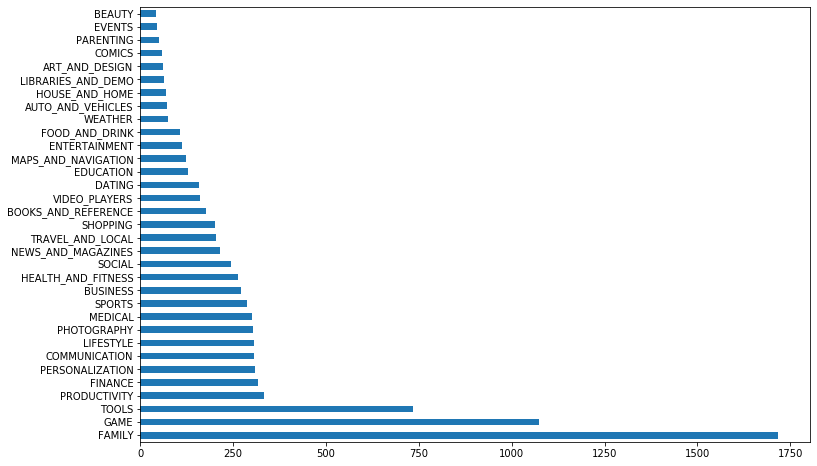

In [254]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

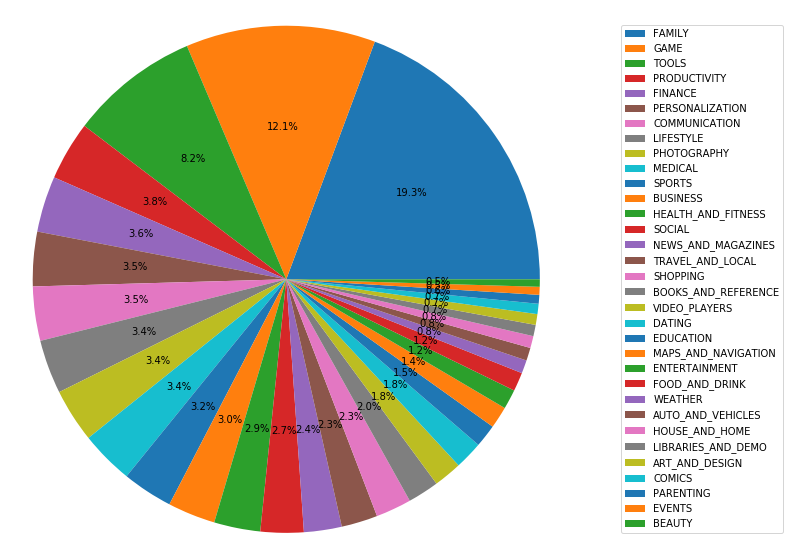

In [255]:
# pie chart pour afficher la distribution des applications dans différentes catégories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

> <b><i style="font-size:14pt;">Le nombre maximal d'applications appartient à la catégorie Famille et Game.</i></b>

<b><i style="font-size:14pt;">Variable <u>Rating</u> :</i></b>

In [256]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<b><i style="font-size:12pt;">Diagramme de distribution de Rating : </i></b>

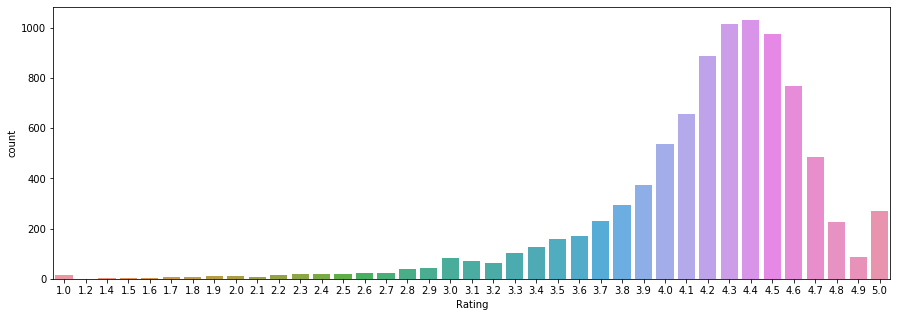

In [257]:
plt.figure(figsize=(15,5))
sns.countplot(x='Rating',data=df)

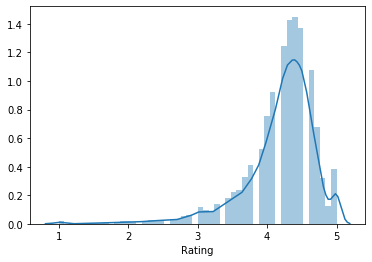

In [258]:
sns.distplot(df.Rating)

> <b><i style="font-size:14pt;">Remarque : la plupart des applications ont clairement un Rating supérieure à 4.0 et beaucoup semblent avoir un Rating : 5.0.</i></b>

In [259]:
print("Nombre d'applications avec notes complètes: ",df.Rating[df['Rating'] == 5 ].count())

Nombre d'applications avec notes complètes:  271


> <b><i style="font-size:14pt;">Il y a 271 applications dans qui ont eu un Rating de 5.0. Est-ce que tout cela le mérite réellement ? Ou est-ce que ces évaluations sont spammées ? Analysons plus loin dans la statistique multivariés </i></b>

<b><i style="font-size:14pt;">Variable <u>Reviews</u> :</i></b>

<b><i style="font-size:12pt;">Diagramme de distribution de Reviews : </i></b>

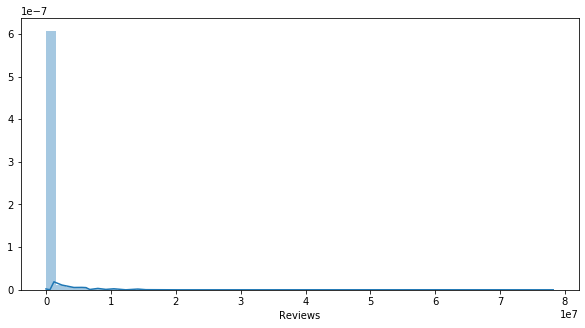

In [260]:
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

<b><i style="font-size:12pt;">Examinons ces applications qui ont un bon nombre de 'Reviews' : </i></b>

In [261]:
# affichage des application qui ont plus de 40 000 000 Reviews
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


> <b><i style="font-size:14pt;">Remarque : Les applications les plus célèbres telles que WhatsApp, Facebook et Clash of Clans sont les applications les plus Reviewed, comme indiqué ci-dessus. </i></b>

In [262]:
df['Reviews']=df['Reviews'].astype(int)

Text(0.5, 1.0, 'Top 5 Applications les plus Reviewed')

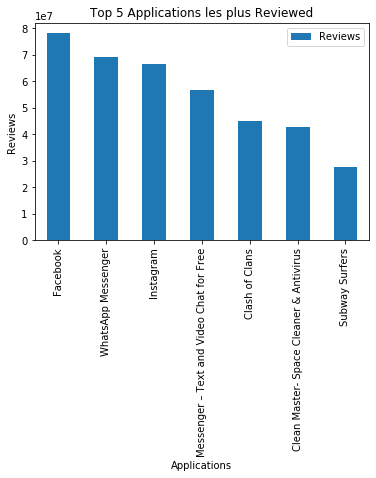

In [263]:
top5reviews=df.nlargest(15,'Reviews')
top5reviews = top5reviews.sort_values(by='Reviews', ascending=False).drop_duplicates('App')
top5reviews.plot(x='App',y='Reviews', kind='bar')
plt.xlabel('Applications')
plt.ylabel('Reviews')
plt.title('Top 5 Applications les plus Reviewed')

<b><i style="font-size:14pt;">Variable <u>Type</u> :</i></b>

([<matplotlib.patches.Wedge at 0x1a1d33b910>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

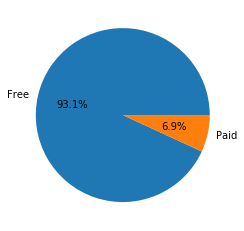

In [264]:
# pourcentage des application 'Paid' et celle 'Free'
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

> <b><i style="font-size:14pt;">Remarque : 93.1% des applications sont gratuites dans le Play Store et seulement 6.9% qui sont payantes</i></b>

<b><i style="font-size:14pt;">Variable <u>Price</u> :</i></b>

In [265]:
# regardeons de plus près les applications avec un Price de plus de 100$
expensive_apps = df[df["Price"]>100]
expensive_apps["Installs"].groupby(expensive_apps["App"]).sum()

App
I AM RICH PRO PLUS                  1000.0
I Am Rich                          10000.0
I Am Rich Premium                  50000.0
I Am Rich Pro                       5000.0
I am Rich                           5000.0
I am Rich Plus                     10000.0
I am Rich!                          1000.0
I am extremely Rich                 1000.0
I am rich                         100000.0
I am rich (Most expensive app)      1000.0
I am rich VIP                      10000.0
I am rich(premium)                  5000.0
I'm Rich - Trump Edition           10000.0
most expensive app (H)               100.0
💎 I'm rich                         10000.0
Name: Installs, dtype: float64

In [266]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


> <b><i style="font-size:14pt;">L'application la plus chère est : I'm Rich - Trump Edition coûte 400$</i></b>

<b><i style="font-size:14pt;">Variable <u>Content Rating</u> :</i></b>

In [267]:
df.columns = df.columns.str.replace( 'Content Rating', 'ContentRating' )
g = pd.DataFrame( df.groupby( 'ContentRating' )[ 'ContentRating' ].count() )
cont = list( df.ContentRating.unique() )
cont

['Everyone',
 'Teen',
 'Everyone 10+',
 'Mature 17+',
 'Adults only 18+',
 'Unrated']

In [268]:
g

,ContentRating
ContentRating,
Adults only 18+,3
Everyone,7089
Everyone 10+,360
Mature 17+,411
Teen,1022
Unrated,1


([<matplotlib.patches.Wedge at 0x1a1d3d5150>,
 [Text(0.001166695254234271, -1.099999381282637, 'Everyone'),
  Text(0.6508979633113157, 0.8867535403691272, 'Teen'),
  Text(-1.0000658732070065, -0.4581137950844833, 'Everyone 10+'),
  Text(-0.8398091436609584, -0.7104369093898824, 'Mature 17+'),
  Text(-0.3895899807576525, -1.0286980348446535, 'Adults only 18+'),
  Text(-0.0003890728223325684, -1.0999999311919701, 'Unrated')],
 [Text(0.0006363792295823295, -0.5999996625178019, '0.03%'),
  Text(0.3550352527152631, 0.4836837492922511, '79.78%'),
  Text(-0.5454904762947307, -0.2498802518642636, '4.05%'),
  Text(-0.45807771472415904, -0.38751104148539034, '4.63%'),
  Text(-0.21250362586781044, -0.5611080190061746, '11.50%'),
  Text(-0.0002122215394541282, -0.5999999624683473, '0.01%')])

<Figure size 432x288 with 0 Axes>

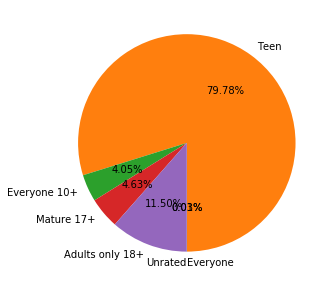

In [269]:
plt.tight_layout()
plt.figure(figsize=(5,5))
plt.pie(g, labels=cont, startangle = -90, autopct = '%.2f%%')

<b><i style="font-size:14pt;">Variable <u>Android Ver</u> :</i></b>

In [270]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

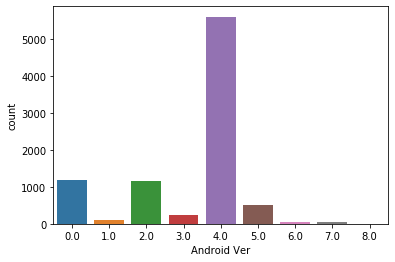

In [271]:
sns.countplot(df['Android Ver'])

> <b><i style="font-size:14pt;">Remarque: la plupart des applications prennent en charge Android 4.0 et les versions ultérieures.</i></b>

\pagebreak

### <b style="font-size:16pt;">Analyses bivariées : </b>

<b><i style="font-size:14pt;"><u>Installs</u> par <u>Catégorie</u> :</i></b>

Nombre d'installements dans Family: 10041080590.0
Nombre d'installements dans Game: 31543862717.0
Nombre d'installements dans Tools: 11450224500.0
Nombre d'installements dans Productivity: 12463070180.0
Nombre d'installements dans Finance: 770312400.0


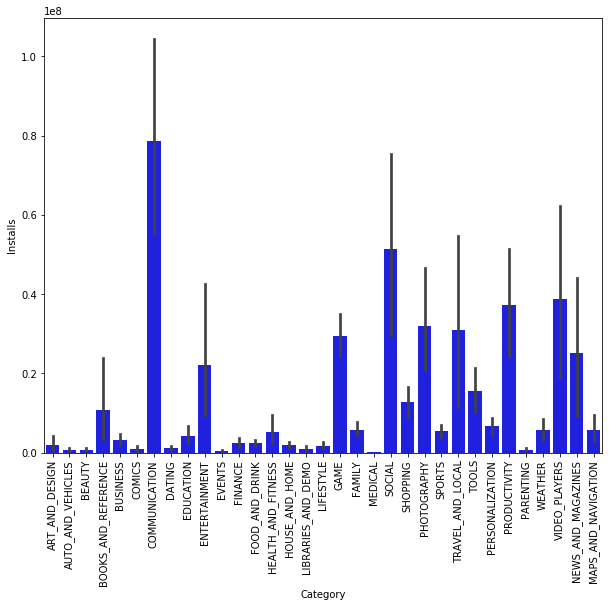

In [272]:
# une vue sur le nbr d'Installs par Catégorie
# par exemple : regardant le nombre d'installations dans les 5 premières catégories
no_of_apps_category = df["Category"].value_counts()
no_of_apps_category[0:5]
number_of_installs = df["Installs"].groupby(df["Category"]).sum()
print(f"Nombre d'installements dans Family: {number_of_installs.loc['FAMILY']}")
print(f"Nombre d'installements dans Game: {number_of_installs.loc['GAME']}")
print(f"Nombre d'installements dans Tools: {number_of_installs.loc['TOOLS']}")
print(f"Nombre d'installements dans Productivity: {number_of_installs.loc['PRODUCTIVITY']}")
print(f"Nombre d'installements dans Finance: {number_of_installs.loc['FINANCE']}")
      
# traçage d'un graphique à barres simple pour représenter le nombre d'installations dans chaque catégorie.
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Installs", data=df, label="Total Installs", color="b")
plt.xticks(rotation=90)
plt.show()

> <b><i style="font-size:14pt;">Resultats : Les 3 principales catégories en termes de nombre d'installations sont : Communication, lecteurs vidéo et divertissement.</i></b>

\pagebreak

<b><i style="font-size:14pt;"><u>Price</u> par <u>Catégorie</u> :</i></b>

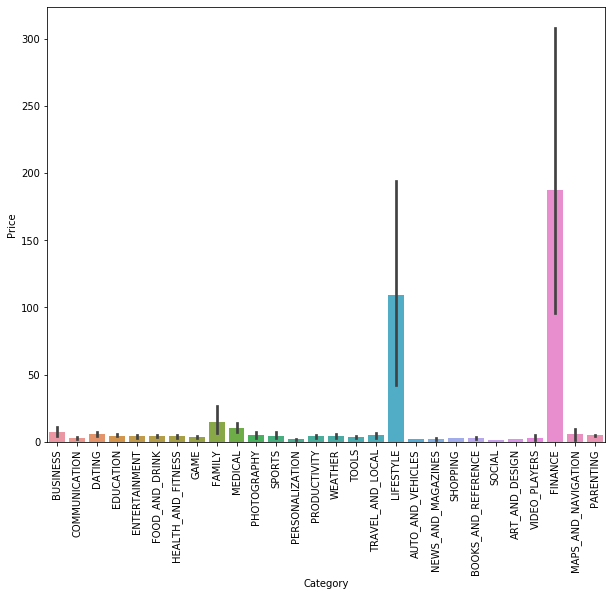

In [273]:
# Regardons pourquoi la famille, même si elle a beaucoup d'applications, n'a pas le plus grand nombre 
# d'installations
# Le prix pourrait être l'un des facteurs
paid_apps = df[df["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

# Visualisons ceci sous la forme d'un simple diagramme à barres
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=paid_apps, label="Total des Apps payées dans chaque catégorie")
plt.xticks(rotation=90)
plt.show()

<b><i style="font-size:14pt;"><u>Rating</u> par <u>Catégorie</u> :</i></b>

4.187958586540634


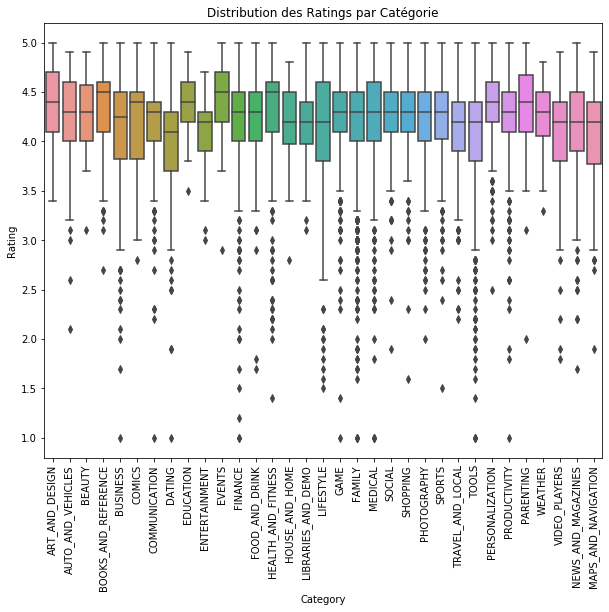

In [274]:
# Ratings of the apps over various categories
# Classement des applications sur différentes catégories
avg_rating = df["Rating"].mean()
print(avg_rating)

plt.figure(figsize=(10,8))
sns.boxplot('Category','Rating',data=df)
plt.title("Distribution des Ratings par Catégorie")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.show();

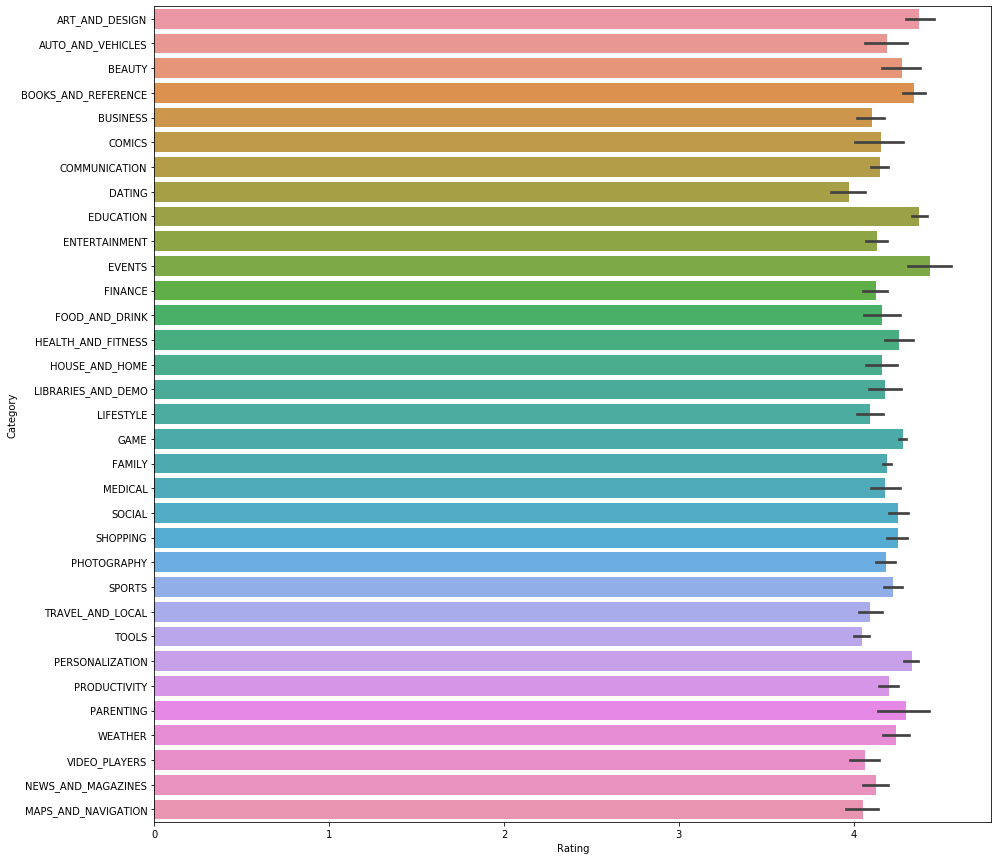

In [275]:
plt.figure(figsize=(15,15))
sns.barplot(x='Rating', y='Category', data=df)

<b><i style="font-size:14pt;"><u>Rating</u> par <u>Type</u> :</i></b>

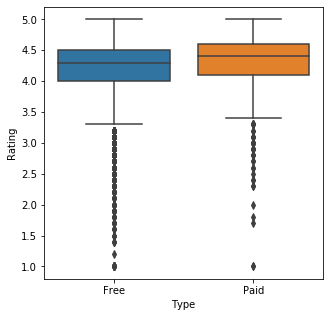

In [276]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.boxplot(x='Type', y='Rating', data=df)

<b><i style="font-size:14pt;"><u>Installs</u> par <u>Price</u> :</i></b>

In [277]:
# Paid Vs free et le nombre d'Installs
installs_greater_1000 = df[df["Installs"]>1000]
installs_greater_1000 = installs_greater_1000.sort_values(['Price'])

<Figure size 1440x1440 with 0 Axes>

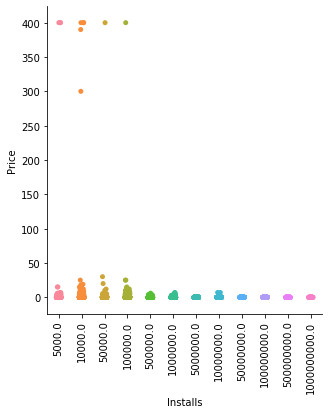

In [278]:
plt.figure(figsize=(20,20))
sns.catplot(x="Installs", y="Price",data=installs_greater_1000);
plt.xticks(rotation=90)
plt.show()

<b><i style="font-size:14pt;"><u>Category</u> par <u>Size</u> :</i></b>

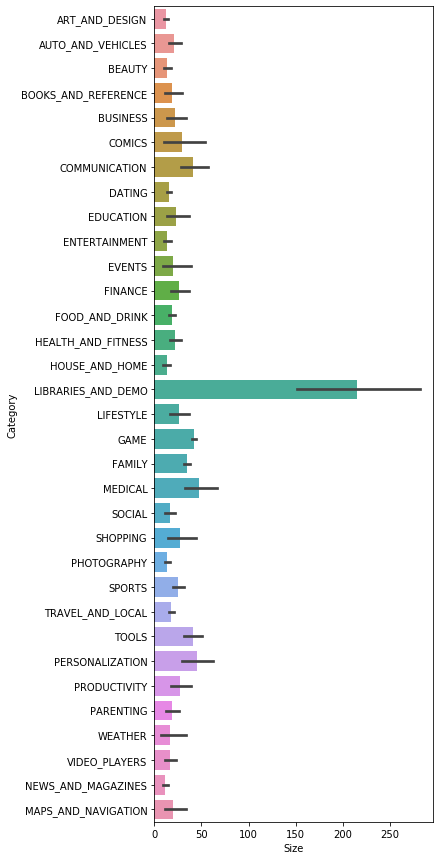

In [279]:
plt.figure(figsize=(5,15))
sns.barplot(x='Size', y='Category', data=df)

> <b><i style="font-size:14pt;">Analyses de la variable <u>Installs</u> : dans cette partie on va se consacrer de la variable Installs avec les autres variables</i></b>


<b><i style="font-size:14pt;">Groupement des nombres d'Installs en 4 groupes : A, B, C, Highest.</i></b>

In [280]:
n=df.Installs
num=[]

for i in n:
    if i <=100:
        num.append('A')
    elif 101<i<100000:
        num.append('B')
    elif 100001<i<100000000:
        num.append('C')
    else:
        num.append('Highest')

        
df['Group'] = num

In [281]:
installs=pd.DataFrame(df.groupby('Group')['Group'].agg({'Count':len}).sort_values('Group', ascending=True))

Text(0.5, 1.0, 'Regroupement des applications Installées')

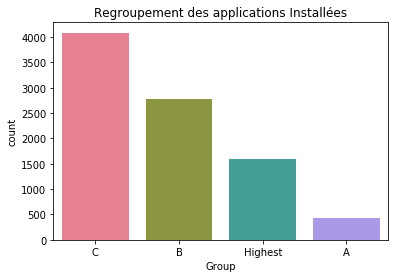

In [282]:
sns.countplot(x='Group', data=df, palette='husl', order=df['Group'].value_counts().index)
plt.title("Regroupement des applications Installées")

Text(0.5, 1.0, "Nombre d'applications installées et leurs Rating par rapport au type d'application")

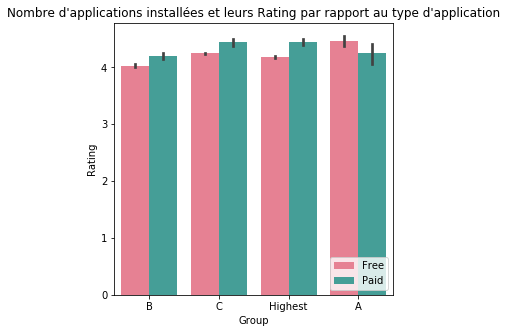

In [283]:
plt.figure(figsize=(5,5))
sns.barplot(x='Group', y='Rating', data=df, hue='Type', palette='husl')
plt.legend(loc=4)
plt.title('Nombre d\'applications installées et leurs Rating par rapport au type d\'application')

> <b><i style="font-size:14pt;">Les applications installées en moins grand nombre ont le Rating la plus élevée. Cependant, la majorité des Apps sont gratuites. Nous pouvons conclure que ces applications pourraient être nouvelles et essayées et examinées par un nombre moindre d'utilisateurs.</i></b>

Text(0.5, 1.0, "Groupe d'applications installées en ce qui concerne les Reviews et le Type")

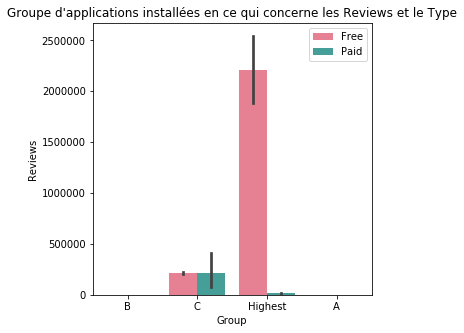

In [284]:
plt.figure(figsize=(5,5))
sns.barplot(x='Group', y='Reviews', data=df, hue='Type', palette='husl')
plt.legend(loc=0)
plt.title('Groupe d\'applications installées en ce qui concerne les Reviews et le Type')

> <b><i style="font-size:14pt;">Les utilisateurs sont plus intéressés par les applications gratuites et donc ces applications ont un plus grand nombre de Reviews</i></b>

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08]),
 <a list of 7 Text xticklabel objects>)

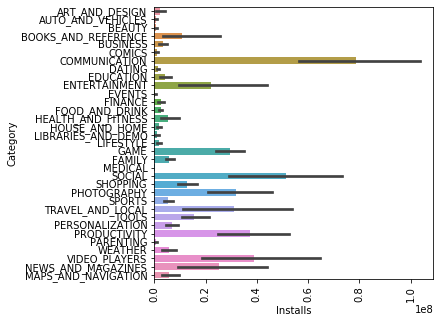

In [285]:
plt.figure(figsize=(5,5))
ax=sns.barplot(x='Installs', y='Category', data=df)
plt.xticks(rotation=90)